In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preperation**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/root_cause_analysis.csv')

In [ ]:
df.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ROOT_CAUSE'] = label_encoder.fit_transform(
                                df['ROOT_CAUSE'])

In [ ]:
df = df.to_numpy().astype(float)

In [ ]:
X = df[:,1:8]

In [ ]:
y = df[:,8]
y = tf.keras.utils.to_categorical(y,3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split( X, y, test_size=0.10)


In [ ]:
print("train data shape",X_train.shape )
print("test data shape",Y_train.shape )

train data shape (900, 7)
test data shape (900, 3)


**Model Building**

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from sklearn import preprocessing

import tensorflow as tf

Output_class = len(label_encoder.classes_)
Hidden_layers = 128

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(Hidden_layers,
                            input_shape = (7,),
                            name='Hidden-Layer-1',
                            activation = 'relu'))
          
model.add(keras.layers.Dense(Hidden_layers,
                            name='Hidden-Layer-2',
                            activation = 'relu'))

model.add(keras.layers.Dense(Output_class,
                            name='Output-layer',
                            activation = 'softmax'))
          
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()





Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,923
Trainable params: 17,923
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size = 16, 
          epochs=10,
          verbose=1,
          validation_split=0.20)

Epoch 1/10
45/45 [==============================] - 1s 6ms/step - loss: 0.7091 - accuracy: 0.7722 - val_loss: 0.4456 - val_accuracy: 0.8389
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 0.5064 - accuracy: 0.8069 - val_loss: 0.3937 - val_accuracy: 0.8389
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.8194 - val_loss: 0.3786 - val_accuracy: 0.8611
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.8236 - val_loss: 0.3851 - val_accuracy: 0.8389
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.8194 - val_loss: 0.3741 - val_accuracy: 0.8444
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4416 - accuracy: 0.8347 - val_loss: 0.3629 - val_accuracy: 0.8611
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.8361 - val_loss: 0.3661 - val_accuracy: 0.8722
Epoch 8/10
45/45 [==

**Model Evaluation**

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.9100


[0.35468077659606934, 0.9100000262260437]

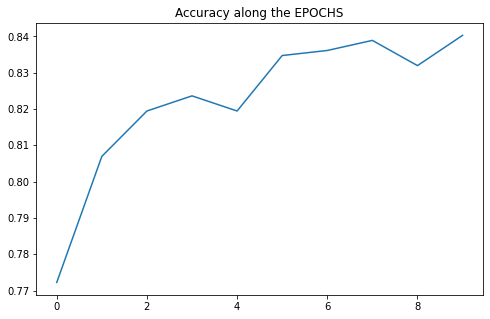

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history)["accuracy"].plot(figsize = (8,5))
plt.title("Accuracy along the EPOCHS")
plt.show()

**Model Prediction**

In [ ]:
CPU_LOAD=0
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=0
ERROR_1002=0
ERROR_1003=0

predction = np.argmax(model.predict(
    [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]), axis=1)

print(label_encoder.inverse_transform(predction))

1/1 [==============================] - 0s 36ms/step
['MEMORY_LEAK']


In [ ]:
print(label_encoder.inverse_transform(np.argmax(
        model.predict([[1,0,1,0,1,1,0],
                                [0,1,1,1,0,1,0],
                                [0,0,1,0,1,0,1],
                                [0,0,1,0,0,1,0],
                                [1,0,1,0,1,1,1]]), axis=1 )))

1/1 [==============================] - 0s 32ms/step
['DATABASE_ISSUE' 'NETWORK_DELAY' 'NETWORK_DELAY' 'NETWORK_DELAY'
 'DATABASE_ISSUE']
